In [3]:
import matplotlib.pyplot as plt
import numpy as np

#### *Let us understand Maths by implementing, In your data science journey you cannot get the complete interpretation of the algorithms without knowing the underlying math.*

Don't change the below code

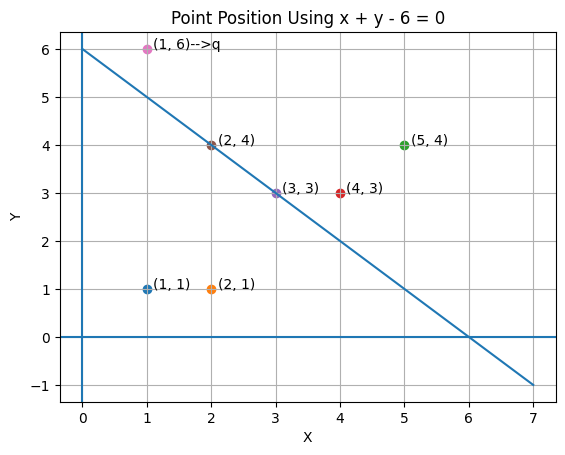

In [4]:
# Line: x + y = 6  →  y = 6 - x
x = np.linspace(0, 7, 100)
y = 6 - x

# Points
left_points = [(1,1), (2,1)]
right_points = [(5,4), (4,3)]
on_line =[(3,3),(2,4)]
q=(1,6)

plt.plot(x, y)

for p in left_points:
    plt.scatter(p[0], p[1])
    plt.text(p[0]+0.1, p[1], f"{p[0],p[1]}")

for p in right_points:
    plt.scatter(p[0], p[1])
    plt.text(p[0]+0.1, p[1], f"{p[0],p[1]}")

for p in on_line:
    plt.scatter(p[0], p[1])
    plt.text(p[0]+0.1, p[1], f"{p[0],p[1]}")

plt.scatter(q[0],q[1])
plt.text(q[0]+0.1, q[1], f"{q[0],q[1]}-->q")

plt.axhline(0)
plt.axvline(0)
plt.grid(True)
plt.title("Point Position Using x + y - 6 = 0")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


1. In the above graph we can see some points to the right of the line, left of the line and also on the line.
2. we can also see a point q.
3. let us try to do some math on these points.



#### Task–1:

1. Calculate the **Euclidean distance** between the query point \(q\) and **all the points on the left side** of the line.

2. Calculate the **Euclidean distance** between the query point \(q\) and **all the points on the right side** of the line.

3. Similarly, calculate the **Euclidean distance** between the query point \(q\) and **a point lying on the line**.

4. Based on your calculations, answer the following:
   - Which point is **nearest to the query point \(q\)?**

---


In [ ]:
# code here




In [13]:
left_distance = [(((p[0]-q[0])**2 + (p[1]-q[1])**2)**0.5) for p in left_points]
left_distance

[5.0, 5.0990195135927845]

In [15]:
right_distane = [(((p[0]-q[0])**2 + (p[1]-q[1])**2)**0.5) for p in right_points]
right_distane

[4.47213595499958, 4.242640687119285]

In [16]:
online_distane = [(((p[0]-q[0])**2 + (p[1]-q[1])**2)**0.5) for p in on_line]
online_distane

[3.605551275463989, 2.23606797749979]

In [ ]:
nearest to the query point (q) is online [2.23]

#### Task -2


In [18]:
line_exp = lambda x, y: 1*x + 1*y - 6 # the equation is x+y-6=0
line_exp(0,0) # substitute the x and y values

-6

1. What do you notice about the sign of the values for:

*   Left-side points?
*   Right-side points?
*   The point on the line?

2. Where does the query point q lie based on its output?

3. What general rule can you infer about the expression 1*x + 1*y - 6?

4. If i give another point w that is not present can you identify on which side of the plane will the point reside?



In [22]:
# code here
#1
for p in left_points:
    print(line_exp(p[0], p[1]))

print("\nRight-side values:")
for p in right_points:
    print(line_exp(p[0], p[1]))

print("\nOn-line values:")
for p in on_line:
    print(line_exp(p[0], p[1]))

-4
-3

Right-side values:
3
1

On-line values:
0
0


In [23]:
#2.
l = line_exp(p[0], q[1])

if l > 0:
    print('right side')
elif l<0:
    print('left side')
else:
    print('online')

right side


In [25]:
#3 if ax-by-c <0 then left side or > 0 then right or = 0 then online

In [26]:
# 4
w = (12,7)
l = line_exp(w[0], w[1])

if l > 0:
    print('right side')
elif l<0:
    print('left side')
else:
    print('online')

right side


### Task3: Classify Points Using the Dot Product with Normal

We have the line:

\[
x + y - 6 = 0
\]

1. The vector perpendicular to the line is called the **normal**, and it is:
\[
n = (1, 1)
\]

2. You are given the following points:

- Left-side candidates: P1 = (1,1), P2 = (2,1)  
- Right-side candidates: P3 = (5,4), P4 = (4,3)  
- On the line: P5 = (3,3), P6 = (2,4)  
- Query point: q = (2,4)

---

#### Instructions:

1. For each point \(p = (x, y)\), compute the expression:
\(
n \.p - 6
\)

2. Based on the **sign of `value`**, classify the point as:

- **Right of the line** (value > 0)  
- **Left of the line** (value < 0)  
- **On the line** (value = 0)

3. Document your results in a dataframe showing:

| Point | Value | Classification |
|-------|-------|----------------|

4. Do the same for the query point `q`.


In [27]:
n= np.array([1,1]) # this is the normal vector of the equation x+y-6=0
p=np.array([2,4])
np.dot(n,p)-6 #----> here the point is (2,4) when computed dot product with (1,1) i.e. normal and subtract 6, the result is 0.
# this point lies on the line.

np.int64(0)

In [52]:
all_points = left_points + right_points + on_line_points


points_list = []
values_list = []
class_list = []


for p in all_points:
    p_vec = np.array(p)
    value = np.dot(n, p_vec) - 6   

    
    if value > 0:
        cls = "Right of the line"
    elif value < 0:
        cls = "Left of the line"
    else:
        cls = "On the line"
    
    
    points_list.append(p)
    values_list.append(value)
    class_list.append(cls)


df = pd.DataFrame({
    "Point": points_list,
    "Value (n·p - 6)": values_list,
    "Classification": class_list
})

df


,Point,Value (n·p - 6),Classification
0,"(1, 1)",-4,Left of the line
1,"(2, 1)",-3,Left of the line
2,"(5, 4)",3,Right of the line
3,"(4, 3)",1,Right of the line
4,"(3, 3)",0,On the line
5,"(2, 4)",0,On the line


In [54]:
q_vec = np.array(q)
q_value = np.dot(n, q_vec) - 6

if q_value > 0:
    q_class = "Right of the line"
elif q_value < 0:
    q_class = "Left of the line"
else:
    q_class = "On the line"


print(f"Point: {q}, Value: {q_value}, Classification: {q_class}")

Point: (2, 4), Value: 0, Classification: On the line


### Task 4: Classify Points and Compute Distances for Planes.

#### 1: Calculate the euclidean distance between these 2 points {p1=(10,1,2), p2=(11,10,2)}

#### 2: 3D Plane
- Plane: x + y + z - 6 = 0
- Points: A(1,1,1), B(2,2,2), C(3,2,2), q(2,1,3)
- Compute:
  1. Dot product: n · p - d
  2. Side of the plane (Above/Below/On)
- Document results in a table:

| Point | Value | Classification |
|-------|-------|----------------|

In [57]:
# 1
p1=(10,1,2) 
p2=(11,10,2)
euclidean_distance = (((p1[0]-p2[0])**2) + ((p1[1]-p2[1])**2) + ((p1[2] - p2[2])**2))**0.5

In [58]:
euclidean_distance

9.055385138137417

In [62]:
n = np.array([1,1,1])
points = [
    ("A", (1,1,1)),
    ("B", (2,2,2)),
    ("C", (3,2,2)),
    ("q", (2,1,3))
]

point_names = []
cord_lst = []
value_lst = []
class_lst = []

for name, p in points:
    p_v = np.array(p)
    value = np.dot(n,p_v) - 6

    if value > 0:
        cls = 'Above'
    elif value <0:
        cls = 'below'
    else:
        cls = 'on'
    point_names.append(name)
    cord_lst.append(p)
    value_lst.append(value)
    class_lst.append(cls)
df = pd.DataFrame({"Point":point_names, "coordinates":cord_lst, "values":value_lst, "classif":class_lst})
df

,Point,coordinates,values,classif
0,A,"(1, 1, 1)",-3,below
1,B,"(2, 2, 2)",0,on
2,C,"(3, 2, 2)",1,Above
3,q,"(2, 1, 3)",0,on


### Task 5: Classify Points and Compute Distances for Hyperplanes

#### 1: Calculate the euclidean distance between these 2 points {p1=(10,1,2,3), p2=(11,10,2,5)}

#### 2: 4D Hyperplane
- Hyperplane: 2x1 + x2 - x3 + x4 - 5 = 0
- Points: P1(1,1,0,2), P2(2,0,1,1), P3(1,2,1,1), q(1,1,1,1)
- Compute:
  1. Dot product: n · p + b , where n is the normal vector and p is the data point b is the intercept.
  2. Euclidean distance from hyperplane
  3. Side (Positive/Negative/On)
- Document results in a table:

| Point | Value | Classification |
|-------|-------|----------------|


In [64]:
p1=(10,1,2,3) 
p2=(11,10,2,5)
euclidean_distance = (((p1[0]-p2[0])**2) + ((p1[1]-p2[1])**2) + ((p1[2] - p2[2])**2) + ((p1[3]-p2[3])**2))**0.5
euclidean_distance

9.273618495495704

In [73]:
n = np.array([2.0, 1.0, -1.0, 1.0])
b = -5.0

# Points
points = [
    ("P1", np.array([1.0, 1.0, 0.0, 2.0])),
    ("P2", np.array([2.0, 0.0, 1.0, 1.0])),
    ("P3", np.array([1.0, 2.0, 1.0, 1.0])),
    ("q" , np.array([1.0, 1.0, 1.0, 1.0]))
]

n_norm = np.sqrt(n[0]*n[0] + n[1]*n[1] + n[2]*n[2] + n[3]*n[3])

names = []
values = []
classes = []

for name, p in points:
    value = np.dot(n, p) + b   # n·p + b

    if value > 0:
        cls = "Positive"
    elif value < 0:
        cls = "Negative"
    else:
        cls = "On"

    names.append(name)
    values.append(value)
    classes.append(cls)

df = pd.DataFrame({
    "Point": names,
    "Value (n·p + b)": values,
    "Classification": classes
})

df


,Point,Value (n·p + b),Classification
0,P1,0.000000,On
1,P2,-1.000000,Negative
2,P3,-1.000000,Negative
3,q,-2.000000,Negative
